<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Spring5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This one uses just 5 features

# Steps


1.   Subest Data
2.   Run Lasso on the Orig Data 
      Change split 3 times and change Alpha 3 x
3.  Now try adjusted data
      plug in Avg April sales
4.  Lastly use augmented data.



# Libraries

In [224]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import pyplot
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import urllib

import datetime as dt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import arange

from yellowbrick.features import ParallelCoordinates
# use automatically configured the lasso regression algorithm
from sklearn.linear_model import LassoCV
import plotly.express as px
from sklearn import metrics
import urllib
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

# Juans code and Metrics

Create Prediction Plots

In [225]:
def Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].set_ylim(0,3)
    ax[0].set_xlim(0,3)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')


    ax[1].scatter(y_test, y_pred_Test)
    ax[1].set_ylim(0,3)
    ax[1].set_xlim(0,3)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    return()

Print Metrics

In [226]:
def Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test):
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_pred_Train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return()

Plot Box Plots

In [227]:
def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()
    

#Data

In [270]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(5)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.

In [271]:
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [272]:
data = data[['date' ,'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [273]:
data.shape

(54, 6)

In [274]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [275]:
cols =data.columns.difference(['date'])

In [276]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

We dont scale the date col here 

In [277]:
data[cols] = sc.fit_transform(data[cols])

In [278]:
data.head(3)

,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215
2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761


In [279]:
data.shape

(54, 6)

# Regress on subsetted data

## LassoCV. 1

#### Training and splitting

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


### Model Creation

https://stackoverflow.com/questions/57205585/how-does-parameter-selection-work-in-lassocv-when-nothing-is-supplied

In [281]:
# TOL tells LAsso when to stop searching for some min 
# value .  

# The default is 1 / 10,ooo.
# Ours ran on any # greater thna tha
#tols = [0.0001 #, 0.001, 0.01, 0.1, 1]
LassoReg = LassoCV(cv = 37, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split

## Alpha score  of 5 , chose 0.001

In [282]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

### Parameter settings

In [ ]:
LassoReg.score

In [283]:
LassoReg.score(X,y)

0.5832049683775525

In [284]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


### Model Details

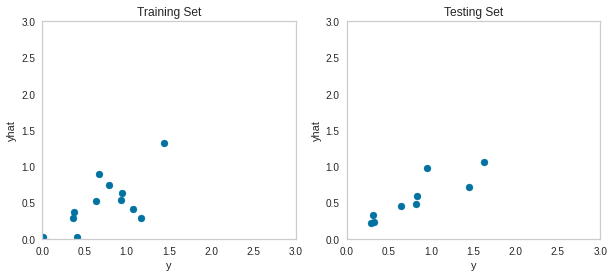

Training Metrics:
R squared: 0.582970545667854
Mean Absolute Error: 0.5014009034461974
Mean Squared Error: 0.40300939654576085
Root Mean Squared Error: 0.6348302108010935

Testing Metrics:
R squared: 0.5785241642076264
Mean Absolute Error: 0.4715011583621411
Mean Squared Error: 0.44679906090700083
Root Mean Squared Error: 0.6684302962216785


()

In [285]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

### Multiple Run Analysis

Train MSE median: 0.42187047716162307
Test MSE median: 0.4209429881094087

Train_R2 median: 0.5989036661316269
Test_R2 median: 0.40599184559297585


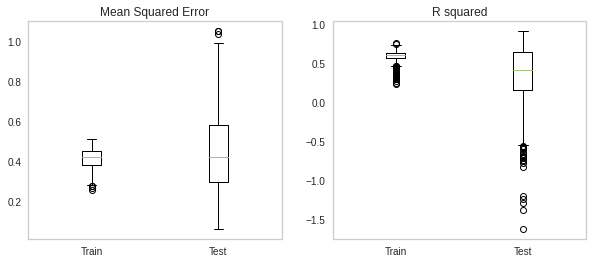

In [193]:
Multiple_Runner(LassoReg, X, y)


# Orig Data split o.5. 2

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [287]:
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 37, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split

In [289]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [288]:
LassoReg.score(X,y)

0.5832049683775525

In [290]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


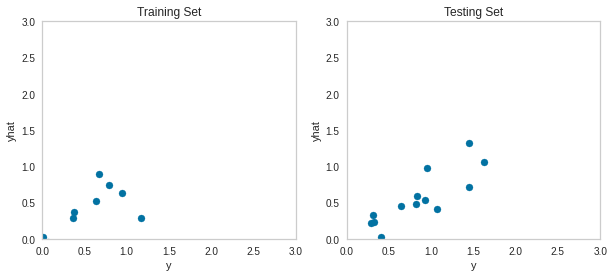

Training Metrics:
R squared: 0.6740070344377518
Mean Absolute Error: 0.4496637513753671
Mean Squared Error: 0.3140081033702132
Root Mean Squared Error: 0.5603642595403575

Testing Metrics:
R squared: 0.46262295858380487
Mean Absolute Error: 0.5343122900937327
Mean Squared Error: 0.5195819598746819
Root Mean Squared Error: 0.7208203381389027


()

In [291]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.42299001642010026
Test MSE median: 0.41838777556308615

Train_R2 median: 0.5995022761367287
Test_R2 median: 0.41653638159372464


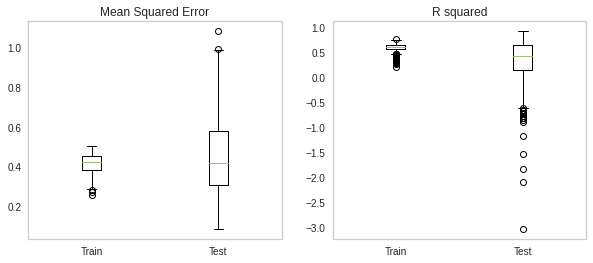

In [202]:
Multiple_Runner(LassoReg, X, y)

## Orig Data 0.2   three

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)

(43, 5)
(11, 5)


In [307]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [308]:
LassoReg.score(X,y)

0.5832049683775525

In [301]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


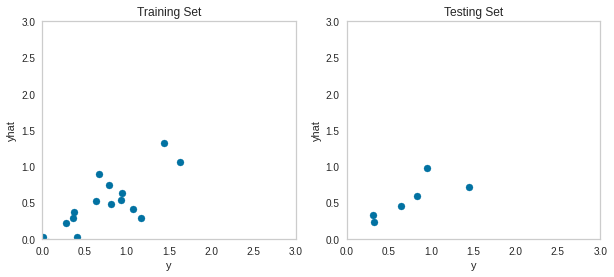

Training Metrics:
R squared: 0.5751583818204165
Mean Absolute Error: 0.5247071378842045
Mean Squared Error: 0.4412735291520134
Root Mean Squared Error: 0.6642842231695808

Testing Metrics:
R squared: 0.6188329347323499
Mean Absolute Error: 0.3640860173313547
Mean Squared Error: 0.3211063594614175
Root Mean Squared Error: 0.5666624740190739


()

In [302]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.42108049945381165
Test MSE median: 0.4252885185393407

Train_R2 median: 0.6015133763885868
Test_R2 median: 0.4037117026384948


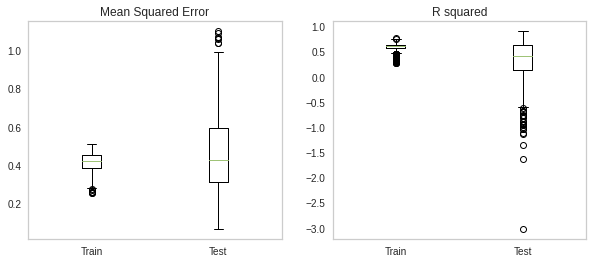

In [209]:
Multiple_Runner(LassoReg, X, y)

# Split 20% , tol = 0.1

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [318]:
# CV = X train split
#LassoReg = LassoCV(cv = 37, random_state=1, tol =0.1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [319]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [320]:
LassoReg.score(X,y)

0.5832049683775525

In [315]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


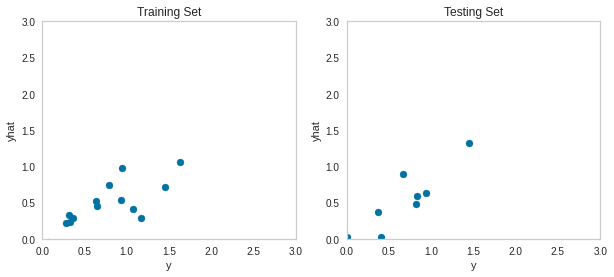

Training Metrics:
R squared: 0.368288467379843
Mean Absolute Error: 0.5378808027743035
Mean Squared Error: 0.4508050174447532
Root Mean Squared Error: 0.6714201497160724

Testing Metrics:
R squared: 0.7888278952657087
Mean Absolute Error: 0.39210373041273333
Mean Squared Error: 0.3427732977739
Root Mean Squared Error: 0.585468443021398


()

In [316]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.41690758309426923
Test MSE median: 0.4396599358253828

Train_R2 median: 0.6000585999314818
Test_R2 median: 0.41110559736247543


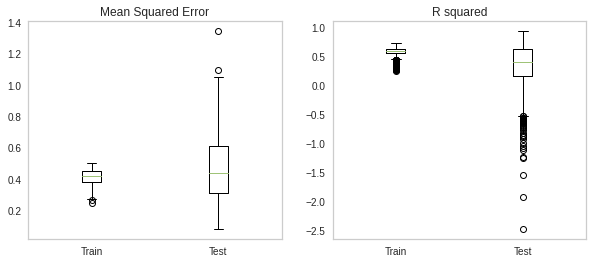

In [317]:
Multiple_Runner(LassoReg, X, y)

# Split 3% , tol = 0.1


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 4)
(17, 4)


In [217]:
# CV = X train split
LassoReg = LassoCV(cv = 37, random_state=1, tol =0.1).fit(X, y) 

In [218]:
LassoReg.score(X,y)

0.5832228282977924

In [219]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.7305110494746865
Coefficients: [0.00000000e+00 1.05983919e-05 0.00000000e+00 0.00000000e+00]


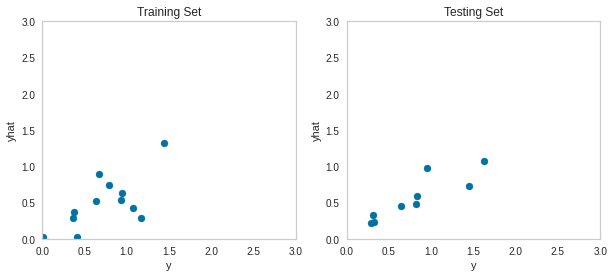

Training Metrics:
R squared: 0.5824345272126727
Mean Absolute Error: 0.5012252591617238
Mean Squared Error: 0.4035273946677542
Root Mean Squared Error: 0.6352380614130062

Testing Metrics:
R squared: 0.579641189953404
Mean Absolute Error: 0.47029195882201713
Mean Squared Error: 0.4456149217183709
Root Mean Squared Error: 0.6675439474059899


()

In [220]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.41484562618236565
Test MSE median: 0.45502248709469295

Train_R2 median: 0.6021553872206249
Test_R2 median: 0.396346631558064


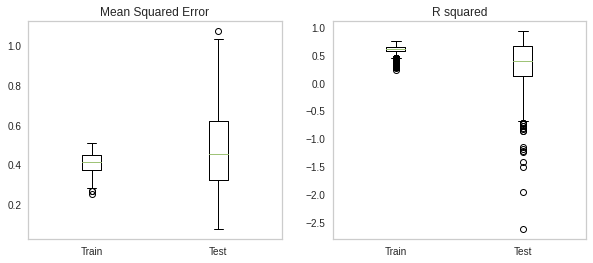

In [221]:
Multiple_Runner(LassoReg, X, y)

# ADJUSTED  

Substitute Qty split o.3  TOL o.01


In [379]:
ADJUSTED_data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
ADJUSTED_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [ ]:
#Add new variable for ADJUSTED  Quantity
#This is the avg of previous Aprils

ADJUSTED_data["Quantity_adj"] = ADJUSTED_data['Quantity']
ADJUSTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
ADJUSTED_data.drop(columns='Quantity')

In [381]:
ADJUSTED_data['date'] = pd.to_datetime(ADJUSTED_data['date'])
ADJUSTED_data['date']= ADJUSTED_data['date'].map(dt.datetime.toordinal)

In [382]:
ADJUSTED_data = ADJUSTED_data[['date' ,'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [383]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [384]:
cols =data.columns.difference(['date'])

In [ ]:
#This is the avg of previous Aprils

ADJUSTED_data["Quantity_adj"] = ADJUSTED_data['Quantity']
ADJUSTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
ADJUSTED_data.drop(columns='Quantity')

In [386]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [387]:
ADJUSTED_data[cols] = sc.fit_transform(ADJUSTED_data[cols])

In [388]:
ADJUSTED_data.shape

(54, 7)

In [365]:
ADJUSTED_data.head()

,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.076213
2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761,-1.346258
3,736420,-2.091651,-2.371991,-0.872854,-0.594309,-0.738789,-2.122585
4,736450,-0.631964,-0.621405,-0.260166,-0.575749,0.417245,-0.665067


In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [390]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [391]:
LassoReg.score(X,y)

0.7582461411245608

In [392]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3185999339649957e-17
Coefficients: [0.         0.282596   0.39057196 0.34889242 0.18087969]


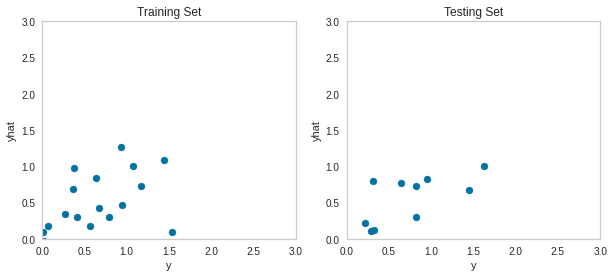

Training Metrics:
R squared: 0.7464502984253809
Mean Absolute Error: 0.39673365703999036
Mean Squared Error: 0.2450256478636175
Root Mean Squared Error: 0.4950006544072619

Testing Metrics:
R squared: 0.7786653801002192
Mean Absolute Error: 0.3882052249076201
Mean Squared Error: 0.234632906371757
Root Mean Squared Error: 0.48438920959467807


()

In [393]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.23871798063244476
Test MSE median: 0.28626181147259294

Train_R2 median: 0.7734410864368455
Test_R2 median: 0.5985520708354981


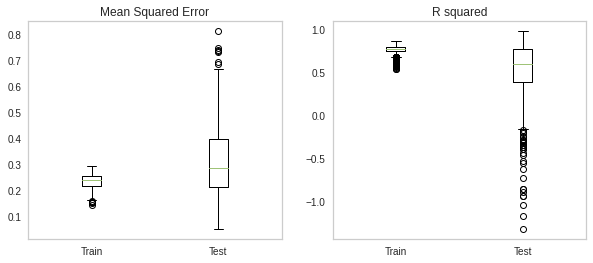

In [394]:
Multiple_Runner(LassoReg, X, y)

### adj data , split o.5 TOL 0.01

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [396]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [397]:
LassoReg.score(X,y)

0.7582461411245608

In [375]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3185999339649957e-17
Coefficients: [0.         0.282596   0.39057196 0.34889242 0.18087969]


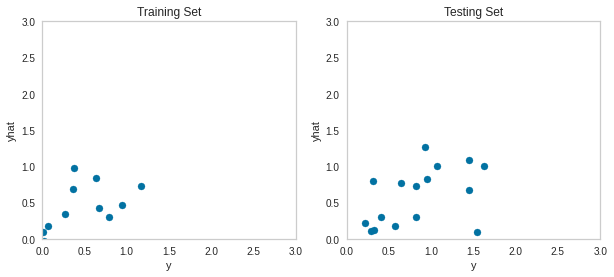

Training Metrics:
R squared: 0.7630835485995522
Mean Absolute Error: 0.4000051720745848
Mean Squared Error: 0.2282064136971399
Root Mean Squared Error: 0.47770954951428374

Testing Metrics:
R squared: 0.735954921384907
Mean Absolute Error: 0.3880923884405702
Mean Squared Error: 0.25530130405373846
Root Mean Squared Error: 0.5052734943114852


()

In [376]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.24100578264010825
Test MSE median: 0.2775406138156856

Train_R2 median: 0.772969412382023
Test_R2 median: 0.5813120813866559


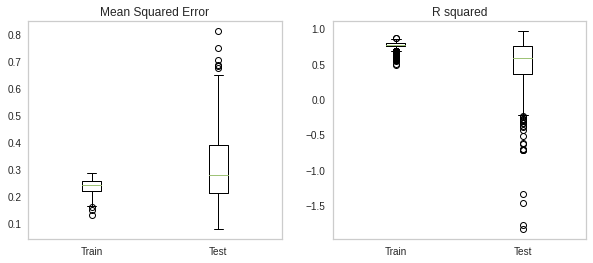

In [377]:
Multiple_Runner(LassoReg, X, y)

# Adjusted Data. Split = 0.3 | TOL 0.1

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [399]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [400]:
LassoReg.score(X,y)

0.7581881242959654

In [401]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3053683323932892e-17
Coefficients: [0.         0.27845701 0.40163255 0.34616667 0.18368738]


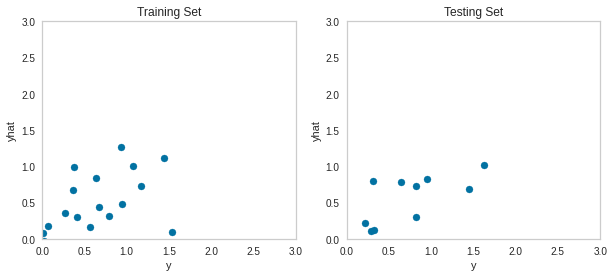

Training Metrics:
R squared: 0.7449728843294128
Mean Absolute Error: 0.3971518704536911
Mean Squared Error: 0.24645339297149685
Root Mean Squared Error: 0.49644072452962285

Testing Metrics:
R squared: 0.7814228608796672
Mean Absolute Error: 0.38639098563093727
Mean Squared Error: 0.23170974988661672
Root Mean Squared Error: 0.4813623893561032


()

In [402]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.23965398013108513
Test MSE median: 0.2850636952277938

Train_R2 median: 0.7703700194454717
Test_R2 median: 0.6055103751106454


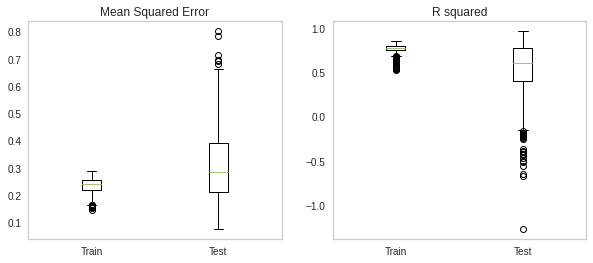

In [403]:
Multiple_Runner(LassoReg, X, y)

# Adjusted Data split 0.5 TOL 0.1

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [405]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [406]:
LassoReg.score(X,y)

0.7581881242959654

In [407]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3053683323932892e-17
Coefficients: [0.         0.27845701 0.40163255 0.34616667 0.18368738]


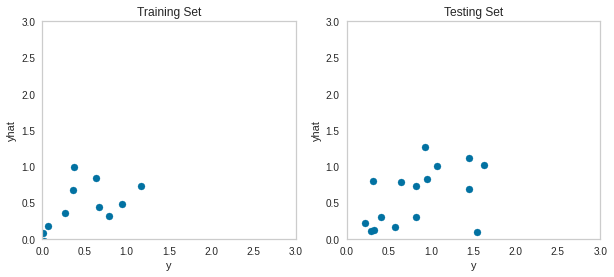

Training Metrics:
R squared: 0.7613230442544936
Mean Absolute Error: 0.4005584130646415
Mean Squared Error: 0.22990219455367894
Root Mean Squared Error: 0.47948117226193454

Testing Metrics:
R squared: 0.737588773099805
Mean Absolute Error: 0.3869699559173032
Mean Squared Error: 0.25372155685439024
Root Mean Squared Error: 0.5037078090067596


()

In [408]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)



Train MSE median: 0.24120569623885096
Test MSE median: 0.2772288781895498

Train_R2 median: 0.7700241796702878
Test_R2 median: 0.602470180987162


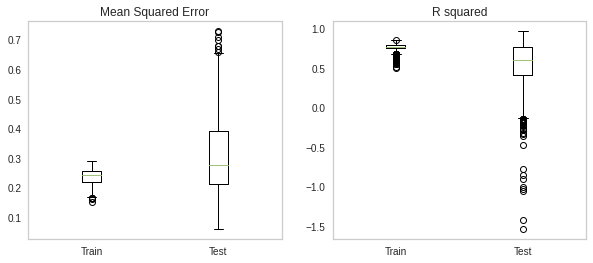

In [409]:
Multiple_Runner(LassoReg, X, y)

# AUGMENTED DATA

We drop the date column

Substitute Adjusted Qunatity. 

We multiply the dataframe a 1/10,ooo several times.

We devide by 1 / 10,ooo sevarla times

 

In [427]:
AUGMENTED_data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
AUGMENTED_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [428]:
 AUGMENTED_data = AUGMENTED_data[['Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [ ]:
#Add new variable for ADJUSTED  Quantity
#This is the avg of previous Aprils

AUGMENTED_data["Quantity_adj"] = AUGMENTED_data['Quantity']
AUGMENTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
AUGMENTED_data.drop(columns='Quantity')

In [430]:
AUGMENTED_data.shape

(54, 6)

## Augment the code Here

In [431]:
one = AUGMENTED_data*1.0001

Multiply the contents and save as a new df and stack them

In [432]:
frames = [one, AUGMENTED_data]
concated_data = pd.concat(frames)
concated_data.shape

(108, 6)

In [420]:
y = AUGMENTED_data['Quantity_adj']
X = AUGMENTED_data.loc[: ,AUGMENTED_data.columns != 'Quantity_adj']

In [421]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [423]:
AUGMENTED_data[cols] = sc.fit_transform(AUGMENTED_data[cols])

In [424]:
AUGMENTED_data.shape

(54, 6)

In [425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [ ]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

In [45]:
########################

In [47]:
# TOL tells LAsso when to stop searching for some min 
# value .  

# Teh default is 1 / 10,ooo.
# Ours ran on any # greater thna tha
#tols = [0.0001 #, 0.001, 0.01, 0.1, 1]
LassoReg = LassoCV(alphas = 0.1,cv = 54, random_state=1, tol =1).fit(X, y)

TypeError: ignored

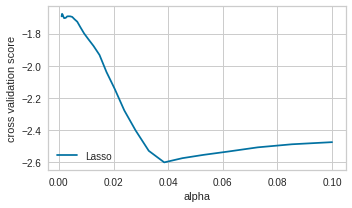

In [70]:
# Alpha scores
# https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_linear_model_cv.html
'''
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()